#### Dados do grafo missing Edges <h4>

In [35]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from community import community_louvain
from networkx.algorithms.community import k_clique_communities
import unidecode

G = nx.read_gml("GraphMissingEdges.gml")
categories = pd.read_csv('categories.csv')
print("Número de nós: {nos}\nNúmero de arestas: {arestas}"
      .format(nos = G.number_of_nodes(), arestas =  G.number_of_edges()))

Número de nós: 4575
Número de arestas: 18991


Grau médio: 8.302076502732241



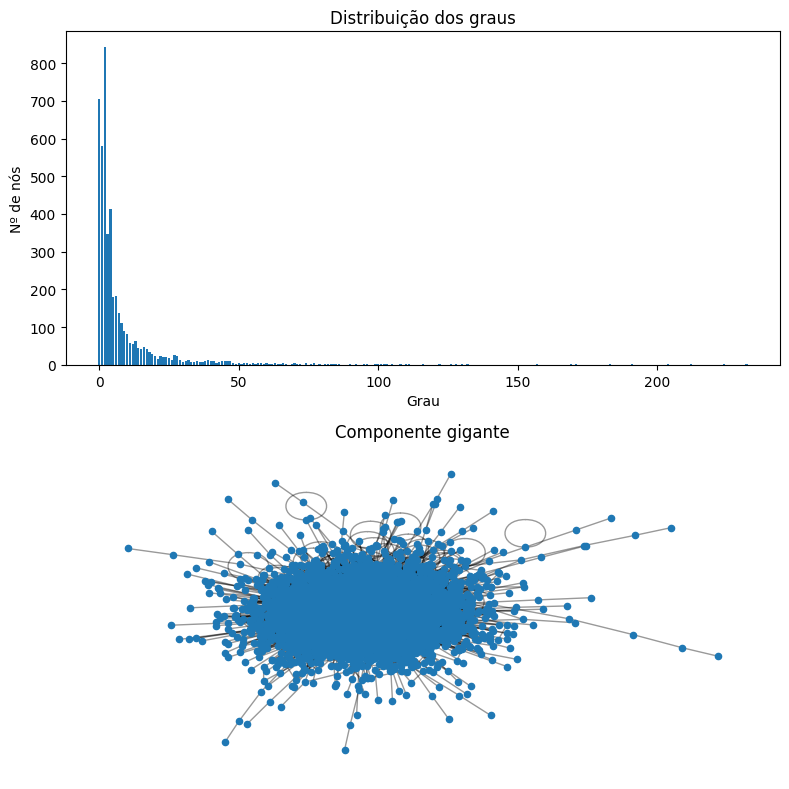

In [13]:
degrees = dict(G.degree())
sum_of_edges = sum(degrees.values())
media = sum_of_edges/G.number_of_nodes()
print("Grau médio: " + str(media) + "\n")
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

fig = plt.figure("Dados de graus", figsize=(8, 8))
axgrid = fig.add_gridspec(8, 8)
ax = fig.add_subplot(axgrid[0:4, :])
ax.bar(*np.unique(degree_sequence, return_counts=True))
ax.set_title("Distribuição dos graus")
ax.set_xlabel("Grau")
ax.set_ylabel("Nº de nós")

ax0 = fig.add_subplot(axgrid[4:, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Componente gigante")
ax0.set_axis_off()

fig.tight_layout()
plt.show()

In [17]:
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
print("Diâmetro do componente gigante: " + str(nx.diameter(Gcc)))

Diâmetro do componente gigante: 13


In [27]:
print("Média clustering: " + str(nx.average_clustering(G)))

Média clustering: 0.04489358044799767


In [19]:
degreeCentrality = nx.degree_centrality(G)
betweenessCentrality = nx.betweenness_centrality(G)
closenessCentrality = nx.closeness_centrality(G)
eigenCentrality = nx.eigenvector_centrality(G)

#### Top 10 centralidade de grau<h4>

In [6]:
dfDegree = pd.DataFrame({'nodeIds':degreeCentrality.keys(), 'degreeCentrality':degreeCentrality.values()}).sort_values(by='degreeCentrality', ascending=False)

dfTemp = dfDegree.iloc[0:10,:]

dfDegreeTop = pd.DataFrame(columns=['nodeId','centrality','name','categories'])

for idrow, row in dfTemp.iterrows():
    
    nome = G.nodes[row['nodeIds']]['name']
    catRaw = G.nodes[row['nodeIds']]['categories'].split(',')
    
    allCategories = ''

    for c in catRaw:

        allCategories += categories[categories['CategoryId']==int(c)]['names'].values[0]+','
    
    
    dfDegreeTop = dfDegreeTop.append({'nodeId':row['nodeIds'],'centrality':row['degreeCentrality'],'name':nome,'categories':allCategories}, ignore_index=True)
    
dfDegreeTop    

,nodeId,centrality,name,categories
0,u4sTiCzVeIHZY8OlaL346Q,0.050721,Gaucho Parrilla Argentina,"Argentine,Latin American,Restaurants,Seafood,"
1,gldPX9ANF5Nic0N7igu2og,0.048972,Condado Tacos,"Restaurants,Tacos,Bars,Cocktail Bars,Nightlife..."
2,dLc1d1zwd1Teu2QED5TmlA,0.046349,Noodlehead,"Thai,Restaurants,Noodles,Food,"
3,woXlprCuowrLJswWere3TQ,0.044600,täkō,"Restaurants,American (New),Mexican,"
4,Voeq7aGDmCGMjE_SQiHwRA,0.041758,Bakersfield,"Nightlife,Bars,Tacos,Cocktail Bars,American (N..."
5,MKYcOZSpMwJK7uwacK13EA,0.040009,Smallman Galley,"Bars,American (Traditional),American (New),Cof..."
6,JLbgvGM4FXh9zNP4O5ZWjQ,0.037385,Meat & Potatoes,"Meat Shops,Food,Specialty Food,Steakhouses,Ame..."
7,BcLFIr4wtd3GQ3fnz15yDQ,0.036948,DiAnoia's Eatery,"Restaurants,Delis,Sandwiches,Italian,"
8,hHgSUnDB9yIrxUEMSmsdoQ,0.034324,Piada Italian Street Food,"Salad,Restaurants,Italian,Wraps,"
9,4mYS-4UOjTKgsf0tX1_IkQ,0.028859,Banh Mi & Ti,"Restaurants,Cafes,Vietnamese,Bubble Tea,Food,"


#### Top 10 centralidade de intermediação<h4>

In [7]:
dfDegree = pd.DataFrame({'nodeIds':betweenessCentrality.keys(), 'betweenessCentrality':betweenessCentrality.values()}).sort_values(by='betweenessCentrality', ascending=False)

dfTemp = dfDegree.iloc[0:10,:]

dfDegreeTop = pd.DataFrame(columns=['nodeId','centrality','name','categories'])

for idrow, row in dfTemp.iterrows():
    
    nome = G.nodes[row['nodeIds']]['name']
    catRaw = G.nodes[row['nodeIds']]['categories'].split(',')
    
    allCategories = ''

    for c in catRaw:

        allCategories += categories[categories['CategoryId']==int(c)]['names'].values[0]+', '
    
    
    dfDegreeTop = dfDegreeTop.append({'nodeId':row['nodeIds'],'centrality':row['betweenessCentrality'],'name':nome,'categories':allCategories}, ignore_index=True)
    
dfDegreeTop    

,nodeId,centrality,name,categories
0,u4sTiCzVeIHZY8OlaL346Q,0.038315,Gaucho Parrilla Argentina,"Argentine, Latin American, Restaurants, Seafood,"
1,gldPX9ANF5Nic0N7igu2og,0.034976,Condado Tacos,"Restaurants, Tacos, Bars, Cocktail Bars, Night..."
2,dLc1d1zwd1Teu2QED5TmlA,0.031020,Noodlehead,"Thai, Restaurants, Noodles, Food,"
3,woXlprCuowrLJswWere3TQ,0.030039,täkō,"Restaurants, American (New), Mexican,"
4,Voeq7aGDmCGMjE_SQiHwRA,0.028528,Bakersfield,"Nightlife, Bars, Tacos, Cocktail Bars, America..."
5,MKYcOZSpMwJK7uwacK13EA,0.024650,Smallman Galley,"Bars, American (Traditional), American (New), ..."
6,JLbgvGM4FXh9zNP4O5ZWjQ,0.022470,Meat & Potatoes,"Meat Shops, Food, Specialty Food, Steakhouses,..."
7,BcLFIr4wtd3GQ3fnz15yDQ,0.020928,DiAnoia's Eatery,"Restaurants, Delis, Sandwiches, Italian,"
8,hHgSUnDB9yIrxUEMSmsdoQ,0.017682,Piada Italian Street Food,"Salad, Restaurants, Italian, Wraps,"
9,mt9mrG8wALTzD3YYGim3mQ,0.014176,City Works - Pittsburgh,"American (New), Pubs, Beer Bar, American (Trad..."


#### Top 10 centralidade de proximidade<h4>

In [8]:
dfDegree = pd.DataFrame({'nodeIds':closenessCentrality.keys(), 'closenessCentrality':closenessCentrality.values()}).sort_values(by='closenessCentrality', ascending=False)

dfTemp = dfDegree.iloc[0:10,:]

dfDegreeTop = pd.DataFrame(columns=['nodeId','centrality','name','categories'])

for idrow, row in dfTemp.iterrows():
    
    nome = G.nodes[row['nodeIds']]['name']
    catRaw = G.nodes[row['nodeIds']]['categories'].split(',')
    
    allCategories = ''

    for c in catRaw:

        allCategories += categories[categories['CategoryId']==int(c)]['names'].values[0]+', '
    
    
    dfDegreeTop = dfDegreeTop.append({'nodeId':row['nodeIds'],'centrality':row['closenessCentrality'],'name':nome,'categories':allCategories}, ignore_index=True)
    
dfDegreeTop    

,nodeId,centrality,name,categories
0,u4sTiCzVeIHZY8OlaL346Q,0.338663,Gaucho Parrilla Argentina,"Argentine, Latin American, Restaurants, Seafood,"
1,woXlprCuowrLJswWere3TQ,0.336692,täkō,"Restaurants, American (New), Mexican,"
2,gldPX9ANF5Nic0N7igu2og,0.336185,Condado Tacos,"Restaurants, Tacos, Bars, Cocktail Bars, Night..."
3,MKYcOZSpMwJK7uwacK13EA,0.333743,Smallman Galley,"Bars, American (Traditional), American (New), ..."
4,Voeq7aGDmCGMjE_SQiHwRA,0.333707,Bakersfield,"Nightlife, Bars, Tacos, Cocktail Bars, America..."
5,dLc1d1zwd1Teu2QED5TmlA,0.332287,Noodlehead,"Thai, Restaurants, Noodles, Food,"
6,JLbgvGM4FXh9zNP4O5ZWjQ,0.332005,Meat & Potatoes,"Meat Shops, Food, Specialty Food, Steakhouses,..."
7,BcLFIr4wtd3GQ3fnz15yDQ,0.331406,DiAnoia's Eatery,"Restaurants, Delis, Sandwiches, Italian,"
8,lqHk6vmnSoTaZwMLSfq1MA,0.321845,Pork & Beans,"American (Traditional), Restaurants, Cocktail ..."
9,hHgSUnDB9yIrxUEMSmsdoQ,0.321183,Piada Italian Street Food,"Salad, Restaurants, Italian, Wraps,"


#### Top 10 centralidade de autovetor<h4>

In [24]:
dfDegree = pd.DataFrame({'nodeIds':eigenCentrality.keys(), 'eigenCentrality':eigenCentrality.values()}).sort_values(by='eigenCentrality', ascending=False)

dfTemp = dfDegree.iloc[0:10,:]

dfDegreeTop = pd.DataFrame(columns=['nodeId','centrality','name','categories'])

for idrow, row in dfTemp.iterrows():
    nome = G.nodes[row['nodeIds']]['name']
    catRaw = G.nodes[row['nodeIds']]['categories'].split(',')
    allCategories = ''

    for c in catRaw:

        allCategories += categories[categories['CategoryId']==int(c)]['names'].values[0]+', '
    
    
    dfDegreeTop = dfDegreeTop.append({'nodeId':row['nodeIds'],'centrality':row['eigenCentrality'],'name':nome,'categories':allCategories}, ignore_index=True)
    
dfDegreeTop    

,nodeId,centrality,name,categories
0,u4sTiCzVeIHZY8OlaL346Q,0.174570,Gaucho Parrilla Argentina,"Argentine, Latin American, Restaurants, Seafood,"
1,woXlprCuowrLJswWere3TQ,0.171904,täkō,"Restaurants, American (New), Mexican,"
2,Voeq7aGDmCGMjE_SQiHwRA,0.163204,Bakersfield,"Nightlife, Bars, Tacos, Cocktail Bars, America..."
3,gldPX9ANF5Nic0N7igu2og,0.161585,Condado Tacos,"Restaurants, Tacos, Bars, Cocktail Bars, Night..."
4,BcLFIr4wtd3GQ3fnz15yDQ,0.158796,DiAnoia's Eatery,"Restaurants, Delis, Sandwiches, Italian,"
5,JLbgvGM4FXh9zNP4O5ZWjQ,0.155639,Meat & Potatoes,"Meat Shops, Food, Specialty Food, Steakhouses,..."
6,MKYcOZSpMwJK7uwacK13EA,0.155466,Smallman Galley,"Bars, American (Traditional), American (New), ..."
7,dLc1d1zwd1Teu2QED5TmlA,0.146671,Noodlehead,"Thai, Restaurants, Noodles, Food,"
8,hHgSUnDB9yIrxUEMSmsdoQ,0.125406,Piada Italian Street Food,"Salad, Restaurants, Italian, Wraps,"
9,lqHk6vmnSoTaZwMLSfq1MA,0.119279,Pork & Beans,"American (Traditional), Restaurants, Cocktail ..."


In [5]:
partition = community_louvain.best_partition(G)

dfDegree = pd.DataFrame({'nodeIds':partition.keys(), 'partition':partition.values()}).sort_values(by='partition')

dfTemp = dfDegree.iloc[:,:]

dfDegreeTop = pd.DataFrame(columns=['nodeId','partition','name','categories'])

for idrow, row in dfTemp.iterrows():
    
    nome = G.nodes[row['nodeIds']]['name']
    catRaw = G.nodes[row['nodeIds']]['categories'].split(',')
    
    allCategories = ''

    for c in catRaw:
        if(c != ""):
            allCategories += categories[categories['CategoryId']==int(c)]['names'].values[0]+' '
    
    
    dfDegreeTop = dfDegreeTop.append({'nodeId':row['nodeIds'],'partition':row['partition'],'name':nome,'categories':allCategories}, ignore_index=True)
    
dfDegreeTop.to_csv('out.csv', index=False)    

In [44]:
c = list(k_clique_communities(G, 4))
file = 0
f = open('./kcliquetxt.txt', 'w')

for i in c:
    #print("------------Comunidade " + str(file) + "------------")
    f.write("------------Comunidade " + str(file) + "------------\n")
    file = file + 1
    for no in sorted(list(i)):
        nome = G.nodes[no]['name']
        catRaw = G.nodes[no]['categories'].split(',')
        latitude = G.nodes[no]['latitude']
        longitude = G.nodes[no]['longitude']
        allCategories = ''

        for c in catRaw:
            if(c != ""):
                allCategories += categories[categories['CategoryId']==int(c)]['names'].values[0]+' '
        row = "{nodeId},{name},{categories},{latitude},{longitude}\n".format(nodeId = no, name = nome, categories=allCategories, latitude = latitude, longitude=longitude)        
        f.write(unidecode.unidecode(row))
        
f.close()
    #dfDegreeTop.to_csv(str(file) + 'outkclique.csv', index=False)
    #file = file + 1
    
#dfDegreeTop.to_csv('outkclique.csv', index=False)    